# Libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Checking Dataset

In [141]:
dataset = pd.read_csv('train(1).csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Splitting Data

In [143]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns='Loan_Status')
y = dataset['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filling Categorical Features

In [144]:
def replace_object_features(dataset: pd.DataFrame):
    for clm in dataset.columns:
        if dataset[clm].dtype == 'object':
            clean_column = dataset[clm].dropna()
            mode = clean_column.mode()[0]
            dataset[clm].fillna(mode, inplace=True)
    return dataset

x_train = replace_object_features(x_train)
x_test = replace_object_features(x_test)

# Filling Numerical Features

In [145]:
def replace_numerical_features(dataset: pd.DataFrame):
    for clm in dataset.columns:
        if (dataset[clm].dtype == np.float64) or (dataset[clm].dtype == np.int64):
            clean_column = dataset[clm].dropna()
            mean = clean_column.mean()
            dataset[clm].fillna(mean, inplace=True)
    return dataset

x_train = replace_numerical_features(x_train)
x_test = replace_numerical_features(x_test)

# Check NAN values

In [146]:
print('Train', x_train.isnull().sum(), sep='\n')
print('\n\nTest', x_test.isnull().sum(), sep='\n')

Train
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Test
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


# Replace values
## replacing string with number

In [147]:
x_train['Married'] = x_train['Married'].replace({'Yes': 1, 'No': 0})
x_test['Married'] = x_test['Married'].replace({'Yes': 1, 'No': 0})

x_train['Self_Employed'] = x_train['Self_Employed'].replace({'Yes': 1, 'No': 0})
x_test['Self_Employed'] = x_test['Self_Employed'].replace({'Yes': 1, 'No': 0})
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001273,Male,1,0,Graduate,0,6000,2250.0,265.0,360.0,0.844789,Semiurban
90,LP001316,Male,1,0,Graduate,0,2958,2900.0,131.0,360.0,1.000000,Semiurban
227,LP001758,Male,1,2,Graduate,0,6250,1695.0,210.0,360.0,1.000000,Semiurban
482,LP002537,Male,1,0,Graduate,0,2083,3150.0,128.0,360.0,1.000000,Semiurban
464,LP002493,Male,0,0,Graduate,0,4166,0.0,98.0,360.0,0.000000,Semiurban


In [148]:
x_train['Dependents'] = x_train['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
x_test['Dependents'] = x_test['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001273,Male,1,0,Graduate,0,6000,2250.0,265.0,360.0,0.844789,Semiurban
90,LP001316,Male,1,0,Graduate,0,2958,2900.0,131.0,360.0,1.000000,Semiurban
227,LP001758,Male,1,2,Graduate,0,6250,1695.0,210.0,360.0,1.000000,Semiurban
482,LP002537,Male,1,0,Graduate,0,2083,3150.0,128.0,360.0,1.000000,Semiurban
464,LP002493,Male,0,0,Graduate,0,4166,0.0,98.0,360.0,0.000000,Semiurban


In [149]:
x_train['Education'] = x_train['Education'].replace({'Graduate':1, 'Not Graduate': 0})
x_test['Education'] = x_test['Education'].replace({'Graduate':1, 'Not Graduate': 0})
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001273,Male,1,0,1,0,6000,2250.0,265.0,360.0,0.844789,Semiurban
90,LP001316,Male,1,0,1,0,2958,2900.0,131.0,360.0,1.000000,Semiurban
227,LP001758,Male,1,2,1,0,6250,1695.0,210.0,360.0,1.000000,Semiurban
482,LP002537,Male,1,0,1,0,2083,3150.0,128.0,360.0,1.000000,Semiurban
464,LP002493,Male,0,0,1,0,4166,0.0,98.0,360.0,0.000000,Semiurban


In [150]:
x_train_dummy_gender = pd.get_dummies(x_train['Gender'])
x_train = pd.concat([x_train, x_train_dummy_gender], axis=1)

x_test_dummy_gender = pd.get_dummies(x_test['Gender'])
x_test = pd.concat([x_test, x_test_dummy_gender], axis=1)


x_train = x_train.drop(columns=['Gender', 'Loan_ID'])
x_test = x_test.drop(columns=['Gender', 'Loan_ID'])
x_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
83,1,0,1,0,6000,2250.0,265.0,360.0,0.844789,Semiurban,False,True
90,1,0,1,0,2958,2900.0,131.0,360.0,1.000000,Semiurban,False,True
227,1,2,1,0,6250,1695.0,210.0,360.0,1.000000,Semiurban,False,True
482,1,0,1,0,2083,3150.0,128.0,360.0,1.000000,Semiurban,False,True
464,0,0,1,0,4166,0.0,98.0,360.0,0.000000,Semiurban,False,True


In [151]:
print(dataset['Property_Area'].value_counts())
x_train['Property_Area'] = x_train['Property_Area'].replace({'Urban':3, 'Semiurban':2, 'Rural':1})
x_test['Property_Area'] = x_test['Property_Area'].replace({'Urban':3, 'Semiurban':2, 'Rural':1})

x_train.head()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
83,1,0,1,0,6000,2250.0,265.0,360.0,0.844789,2,False,True
90,1,0,1,0,2958,2900.0,131.0,360.0,1.000000,2,False,True
227,1,2,1,0,6250,1695.0,210.0,360.0,1.000000,2,False,True
482,1,0,1,0,2083,3150.0,128.0,360.0,1.000000,2,False,True
464,0,0,1,0,4166,0.0,98.0,360.0,0.000000,2,False,True


In [152]:
y_train = y_train.replace({'N':0, 'Y': 1})
y_test = y_test.replace({'N':0, 'Y': 1})

y_train.head()

83     0
90     1
227    1
482    1
464    0
Name: Loan_Status, dtype: int64

# Feature Scaling

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

x_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,1.0,0.000000,1.0,0.0,0.072356,0.054000,0.363104,0.74359,0.844789,0.5,0.0,1.0
1,1.0,0.000000,1.0,0.0,0.034731,0.069599,0.166911,0.74359,1.000000,0.5,0.0,1.0
2,1.0,0.666667,1.0,0.0,0.075448,0.040680,0.282577,0.74359,1.000000,0.5,0.0,1.0
3,1.0,0.000000,1.0,0.0,0.023908,0.075599,0.162518,0.74359,1.000000,0.5,0.0,1.0
4,0.0,0.000000,1.0,0.0,0.049672,0.000000,0.118594,0.74359,0.000000,0.5,0.0,1.0


# Manage data imbalance

In [154]:
y_train.value_counts()

Loan_Status
1    342
0    149
Name: count, dtype: int64

In [155]:
#over sampling
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)

y_train.value_counts()

Loan_Status
0    342
1    342
Name: count, dtype: int64

# Model

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

# Evaluation

In [162]:
from sklearn.metrics import classification_report

y_test_pred = lda.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63        43
           1       0.80      0.82      0.81        80

    accuracy                           0.75       123
   macro avg       0.72      0.71      0.72       123
weighted avg       0.74      0.75      0.75       123



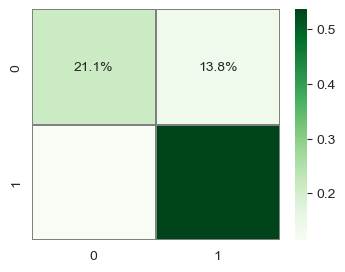

In [163]:
from sklearn.metrics import confusion_matrix
cm_matrix = confusion_matrix(y_test,  y_test_pred)

fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, fmt='.1%', cmap='Greens', linecolor='gray', linewidth=0.3)
plt.show()